### Deep Learning Assignment 2 Testing


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats.mstats import winsorize

In [3]:
data_train = pd.read_csv('datasets/no1_train.csv')
data_valid = pd.read_csv('datasets/no1_validation.csv')

data_train['y*'] = data_train['y']
data_valid['y*'] = data_valid['y']

data_train['y_original'] = data_train['y']
data_valid['y_original'] = data_valid['y']

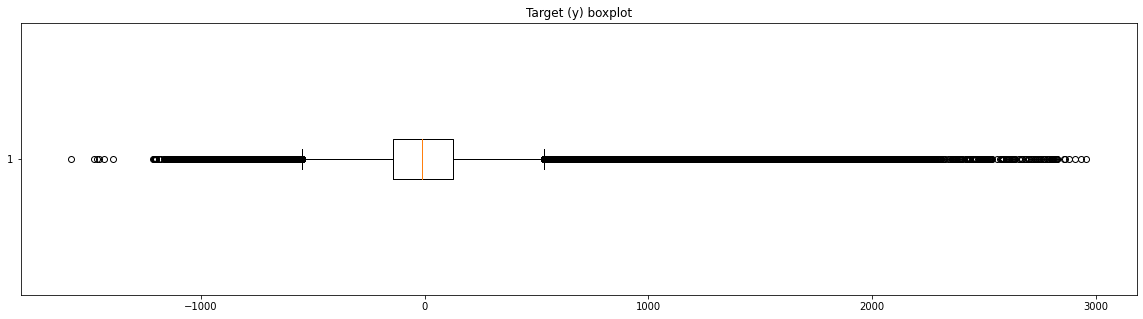

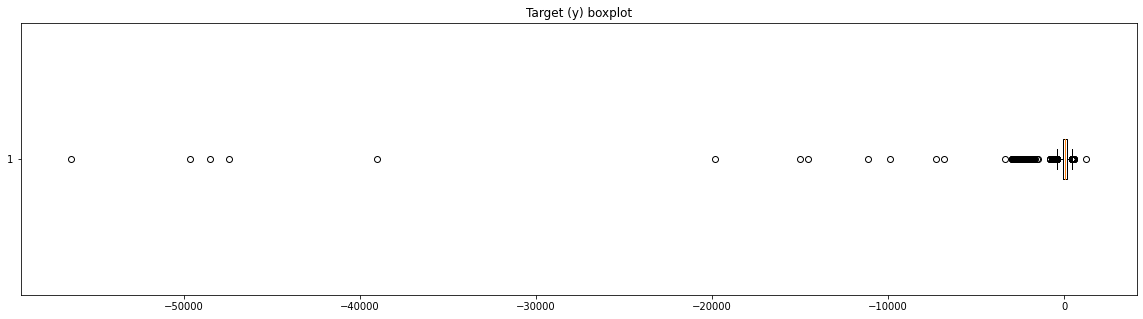

In [4]:
def show_boxplot(dataframe, column):
    """
    Show a boxplot of the data in the given column of the given dataframe.
    """
    plt.figure(figsize=(20, 5))
    plt.title('Target (y) boxplot')
    plt.boxplot(dataframe[column], vert=False)
    plt.show()

show_boxplot(data_train, 'y*')
show_boxplot(data_valid, 'y*')

#### Remove outliers

Using winsorization, bound 1% of the outliers to maximum and minimum values.

In [7]:
def winsorize_one_percent(dataframe):
    """
    Winsorizes the data in the y*-column. This is done by setting the upper 
    0.5% and lower 0.5% to an upper and a lower bound.
    """
    winsorized = winsorize(dataframe['y*'], limits=[0.005, 0.005])
    dataframe['y*'] = np.array(winsorized)
    return dataframe

data_train = winsorize_one_percent(data_train)
data_valid = winsorize_one_percent(data_valid)

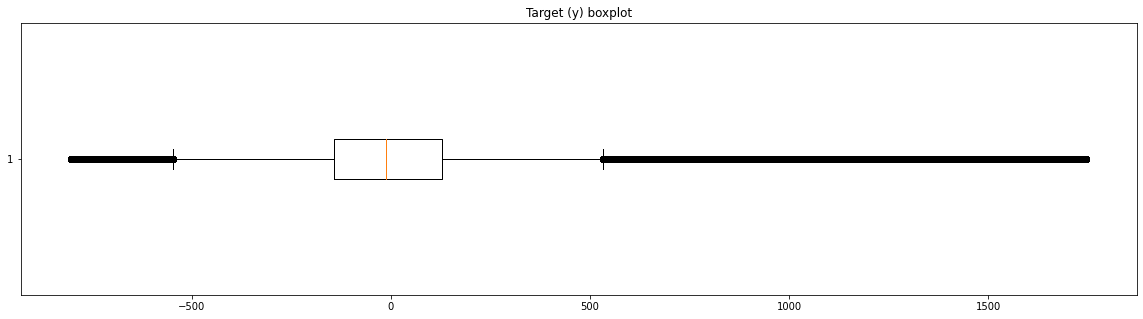

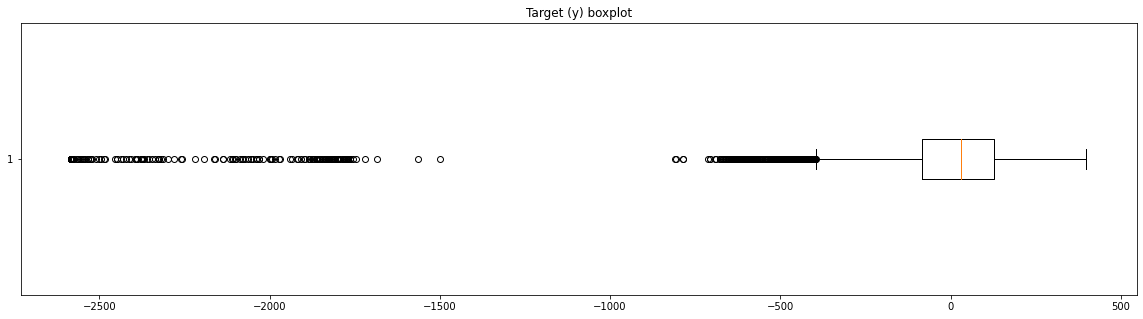

In [8]:
show_boxplot(data_train, 'y*')
show_boxplot(data_valid, 'y*')

In [6]:
def normalize_data(dataframe, new_min: int = 0, new_max: int = 1):
    """
    Normalizes the given data in the 'y*'-column using the rescaling method.
    The new data is stored in a new column called 'y*norm' and is by default 
    in the range [0, 1]. This range can be customized using the params
    new_min and new_max.
    """
    col = dataframe['y*']
    dataframe['y*norm'] = new_min + ((col - col.min()) / (col.max() - col.min())) * (new_max-new_min)

# normalize_data(data_train, new_min=-1, new_max=1)
normalize_data(data_train)

In [7]:
def standardize_data(dataframe):
    """
    Standardizes the given data in the 'y*'-column using Z-score normalization.
    The mean of the column is subtracted from all values and the resulting
    values are divided by the standard deviation.
    """
    col = dataframe['y*']
    mean = col.mean()
    std = col.std()
    dataframe['y*std'] = (col - mean) / std

standardize_data(data_train)

In [8]:
# Add shifted y value as y_previous
data_train['y*_prev'] = data_train['y*'].shift(1)
data_train['y*norm_prev'] = data_train['y*norm'].shift(1)
data_train['y*std_prev'] = data_train['y*std'].shift(1)

data_train['y*']

# Set which y to predict
data_train['y'] = data_train['y*norm']

data_train

,start_time,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,y*,y_original,y*norm,y*std,y*_prev,y*norm_prev,y*std_prev
0,2019-01-09 14:10:00,1591.839,141.928,11.5,74.428,0.0,1819.695,0.449041,10.0,-4417.4,341.330021,341.330021,0.449041,1.079338,NaN,NaN,NaN
1,2019-01-09 14:15:00,1591.839,141.928,11.5,74.428,0.0,1819.695,0.444638,10.0,-4417.4,330.114330,330.114330,0.444638,1.043029,341.330021,0.449041,1.079338
2,2019-01-09 14:20:00,1591.839,141.928,11.5,74.428,0.0,1819.695,0.442189,10.0,-4417.4,323.877221,323.877221,0.442189,1.022837,330.114330,0.444638,1.043029
3,2019-01-09 14:25:00,1591.839,141.928,11.5,74.428,0.0,1819.695,0.431418,10.0,-4417.4,296.438463,296.438463,0.431418,0.934009,323.877221,0.442189,1.022837
4,2019-01-09 14:30:00,1591.839,141.928,11.5,74.428,0.0,1819.695,0.420684,10.0,-4417.4,269.097132,269.097132,0.420684,0.845496,296.438463,0.431418,0.934009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,2021-03-01 03:05:00,1942.486,191.881,20.1,106.431,0.0,2266.098,0.370639,0.0,-2252.9,141.618915,141.618915,0.370639,0.432808,141.026229,0.370407,0.430889
225084,2021-03-01 03:10:00,1942.486,191.881,20.1,106.431,0.0,2266.098,0.365703,0.0,-2252.9,129.043820,129.043820,0.365703,0.392098,141.618915,0.370639,0.432808
225085,2021-03-01 03:15:00,1942.486,191.881,20.1,106.431,0.0,2266.098,0.352302,0.0,-2252.9,94.907548,94.907548,0.352302,0.281588,129.043820,0.365703,0.392098
225086,2021-03-01 03:20:00,1942.486,191.881,20.1,106.431,0.0,2266.098,0.355317,0.0,-2252.9,102.589040,102.589040,0.355317,0.306456,94.907548,0.352302,0.281588


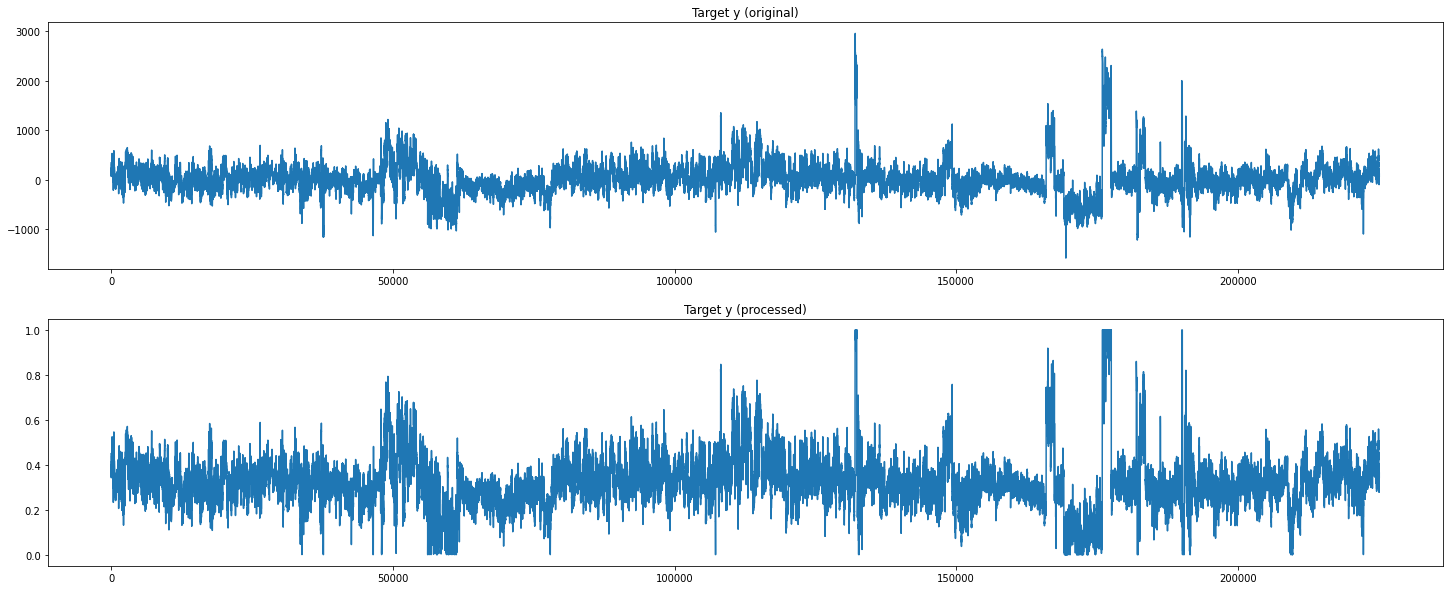

In [9]:
figs, axs = plt.subplots(2, figsize=(25, 10))
axs[0].set_title('Target y (original)')
axs[0].plot(data_train['y_original'])
axs[1].set_title('Target y (processed)')
axs[1].plot(data_train['y'])
plt.show()

### Feature engineering

##### Date and time features

I will add date and time features to the dataset, dervied from the 'start_time'-column, but with values usable by the neural network.

In [10]:
def add_hour_of_day(dataframe):
    hour_of_day = pd.to_datetime(dataframe['start_time']).dt.hour
    dataframe['hour_of_day'] = hour_of_day

def add_min_of_day(dataframe):
    min_of_day = pd.to_datetime(dataframe['start_time']).dt.minute + dataframe['hour_of_day']*60
    min_of_day_norm = 2*np.pi*min_of_day/min_of_day.max()
    sin_minute = round(np.sin(min_of_day_norm), 6)
    cos_minute = np.cos(min_of_day_norm)

    dataframe['min_of_day'] = min_of_day
    dataframe['cos_minute'] = cos_minute
    dataframe['sin_minute'] = sin_minute

def add_day_of_week(dataframe):
    day_of_week = pd.to_datetime(dataframe['start_time']).dt.day_of_week
    day_of_week_norm = 2*np.pi*day_of_week/day_of_week.max()
    sin_weekday = round(np.sin(day_of_week_norm), 2)
    cos_weekday = np.cos(day_of_week_norm)

    dataframe['day_of_week'] = day_of_week 
    dataframe['cos_weekday'] = cos_weekday
    dataframe['sin_weekday'] = sin_weekday

def add_day_of_year(dataframe):
    day_of_year = pd.to_datetime(dataframe['start_time']).dt.day_of_year
    day_of_year_norm = 2*np.pi*day_of_year/day_of_year.max()
    sin_yearday = np.sin(day_of_year_norm)
    cos_yearday = np.cos(day_of_year_norm)

    dataframe['day_of_year'] = day_of_year
    dataframe['cos_yearday'] = cos_yearday
    dataframe['sin_yearday'] = sin_yearday

add_hour_of_day(data_train)
add_min_of_day(data_train)
add_day_of_week(data_train)
add_day_of_year(data_train)

data_train.iloc[116:409][[
    'start_time',
    'cos_minute',
    'sin_minute',
    'cos_weekday',
    'sin_weekday',
    'cos_yearday',
    'sin_yearday',
    'day_of_year',
    'day_of_week',
    'hour_of_day'
]]

,start_time,cos_minute,sin_minute,cos_weekday,sin_weekday,cos_yearday,sin_yearday,day_of_year,day_of_week,hour_of_day
116,2019-01-09 23:50:00,0.999760,-0.021891,-0.5,0.87,0.988088,0.153891,9,2,23
117,2019-01-09 23:55:00,1.000000,-0.000000,-0.5,0.87,0.988088,0.153891,9,2,23
118,2019-01-10 00:00:00,1.000000,0.000000,-1.0,0.00,0.985301,0.170830,10,3,0
119,2019-01-10 00:05:00,0.999760,0.021891,-1.0,0.00,0.985301,0.170830,10,3,0
120,2019-01-10 00:10:00,0.999042,0.043771,-1.0,0.00,0.985301,0.170830,10,3,0
...,...,...,...,...,...,...,...,...,...,...
404,2019-01-10 23:50:00,0.999760,-0.021891,-1.0,0.00,0.985301,0.170830,10,3,23
405,2019-01-10 23:55:00,1.000000,-0.000000,-1.0,0.00,0.985301,0.170830,10,3,23
406,2019-01-11 00:00:00,1.000000,0.000000,-0.5,-0.87,0.982223,0.187719,11,4,0
407,2019-01-11 00:05:00,0.999760,0.021891,-0.5,-0.87,0.982223,0.187719,11,4,0


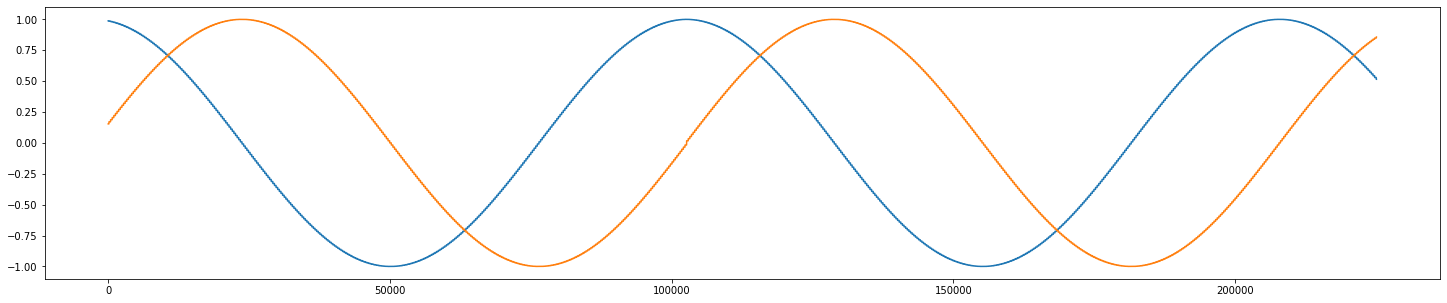

In [11]:
plt.figure(figsize=(25, 5))
plt.plot(data_train['cos_yearday'])
plt.plot(data_train['sin_yearday'])
plt.show()

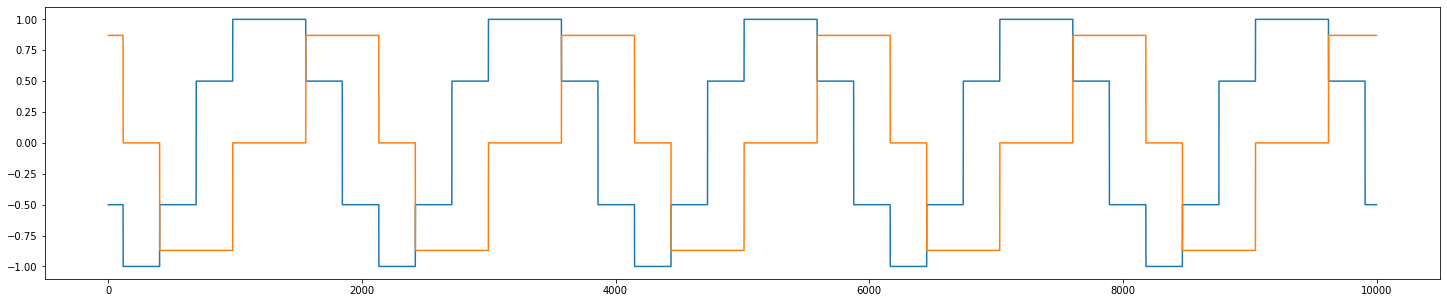

In [12]:
plot_range = 10000
plt.figure(figsize=(25, 5))
plt.plot(data_train.iloc[:plot_range]['cos_weekday'])
plt.plot(data_train.iloc[:plot_range]['sin_weekday'])
plt.show()

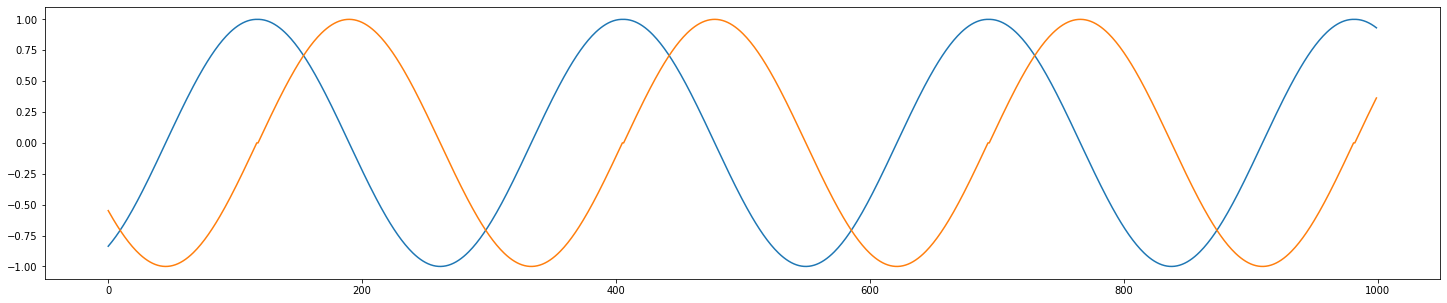

In [13]:
plot_range = 1000
plt.figure(figsize=(25, 5))
plt.plot(data_train.iloc[:plot_range]['cos_minute'])
plt.plot(data_train.iloc[:plot_range]['sin_minute'])
plt.show()

In [14]:
data_train['date'] = pd.to_datetime(data_train['start_time']).dt.date
daily_mean = data_train.groupby(['date']).y.mean()
daily_mean = pd.DataFrame(daily_mean)
daily_mean['date'] = daily_mean.index
daily_mean = daily_mean.set_index(np.arange(len(daily_mean)))
daily_mean = daily_mean.rename(columns={'y': 'daily_mean'})

daily_mean['daily_mean'] = daily_mean['daily_mean'].shift(1)

daily_mean

data_train = data_train.merge(daily_mean, left_on='date', right_on='date')

data_train.drop(['hydro', 'micro', 'thermal', 'wind', 'river', 'total', 'sys_reg', 'flow'], axis=1)


,start_time,y,y*,y_original,y*norm,y*std,y*_prev,y*norm_prev,y*std_prev,hour_of_day,...,cos_minute,sin_minute,day_of_week,cos_weekday,sin_weekday,day_of_year,cos_yearday,sin_yearday,date,daily_mean
0,2019-01-09 14:10:00,0.449041,341.330021,341.330021,0.449041,1.079338,NaN,NaN,NaN,14,...,-0.836378,-0.548153,2,-0.5,0.87,9,0.988088,0.153891,2019-01-09,NaN
1,2019-01-09 14:15:00,0.444638,330.114330,330.114330,0.444638,1.043029,341.330021,0.449041,1.079338,14,...,-0.824178,-0.566331,2,-0.5,0.87,9,0.988088,0.153891,2019-01-09,NaN
2,2019-01-09 14:20:00,0.442189,323.877221,323.877221,0.442189,1.022837,330.114330,0.444638,1.043029,14,...,-0.811583,-0.584237,2,-0.5,0.87,9,0.988088,0.153891,2019-01-09,NaN
3,2019-01-09 14:25:00,0.431418,296.438463,296.438463,0.431418,0.934009,323.877221,0.442189,1.022837,14,...,-0.798599,-0.601864,2,-0.5,0.87,9,0.988088,0.153891,2019-01-09,NaN
4,2019-01-09 14:30:00,0.420684,269.097132,269.097132,0.420684,0.845496,296.438463,0.431418,0.934009,14,...,-0.785232,-0.619201,2,-0.5,0.87,9,0.988088,0.153891,2019-01-09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,2021-03-01 03:05:00,0.370639,141.618915,141.618915,0.370639,0.432808,141.026229,0.370407,0.430889,3,...,0.689479,0.724306,0,1.0,0.00,60,0.514793,0.857315,2021-03-01,0.41083
225084,2021-03-01 03:10:00,0.365703,129.043820,129.043820,0.365703,0.392098,141.618915,0.370639,0.432808,3,...,0.673458,0.739226,0,1.0,0.00,60,0.514793,0.857315,2021-03-01,0.41083
225085,2021-03-01 03:15:00,0.352302,94.907548,94.907548,0.352302,0.281588,129.043820,0.365703,0.392098,3,...,0.657114,0.753791,0,1.0,0.00,60,0.514793,0.857315,2021-03-01,0.41083
225086,2021-03-01 03:20:00,0.355317,102.589040,102.589040,0.355317,0.306456,94.907548,0.352302,0.281588,3,...,0.640455,0.767995,0,1.0,0.00,60,0.514793,0.857315,2021-03-01,0.41083
